# Localize probe and microcircuit

**Highlights**:

* 30,190 target microcircuit cells
* 854 cells with sorted activity organized in two columns aligned with the microcircuit's vertical axis
* the probe is located parallel to the microcircuit's vertical axis

**Observations / predictions**:

- The two center shanks cover the microcircuit and should record lots of activity, while other shanks do not and should not cover much.


## Setup

In [1]:
%load_ext autoreload
%autoreload 2
import os
import bluepy as bp # see 2 for doc 
from matplotlib import pyplot as plt
import yaml
from probeinterface.plotting import plot_probe

In [2]:
proj_path = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting"
os.chdir(proj_path)

In [39]:
from src.pipelines.simulation.dataeng.loading import load_simulation
from src.pipelines.simulation.preprocessing import silico_preprocess
from src.pipelines.simulation.dataeng.filtering import filter_microcircuit_cells
from src.pipelines.simulation.sorting import ground_truth

In [4]:
# load the chosen simulation configs
with open("conf/silico/dataset.yml") as dataset_conf:
    dataset_conf = yaml.safe_load(dataset_conf)
with open("conf/silico/parameters.yml") as param_conf:
    param_conf = yaml.safe_load(param_conf)

In [5]:
# load simulation
simulation = load_simulation(dataset_conf, param_conf)

Invalid absolute path: /gpfs/bbp.cscs.ch/project/proj45/scratch/S1full/METypes
Have keys ({'LFPWeightsPath', 'KeepModelData'}) that are not defined for section: Run
Ignoring unknown key: 'LFPWeightsPath'
Ignoring unknown key: 'KeepModelData'


In [6]:
# count all the cells
print("Cells (total count):", simulation["simulation"].circuit.cells.count())

Cells (total count): 4234929


## Select the 30K target cell group (See 3).

[TODO] clarify:  
- "finds all the cells closer than radius to at least one contact".
- is the radius 50 microns?

In [7]:
# get the soma positions of a target group of neurons
filtered = filter_microcircuit_cells(simulation)
print("Cell (count): ", len(filtered["soma_location"]))
print("Cell soma locations:")
filtered["soma_location"].head(3)

Cell (count):  30190
Cell soma locations:


,x,y,z
301,4497.177400,-1404.791079,-1710.819955
335,4529.640691,-1224.749812,-1673.584629
381,4424.035627,-1420.609607,-1623.004889


In [8]:
# Describe the cells contrained in selected group (see 1)
print("Cell identifiers:\n\n", filtered["gid"], "\n")
print("Repertoire of all possible target groups:\n\n", sorted(simulation["simulation"].circuit.cells.targets))

Cell identifiers:

 [    301     335     381 ... 4234649 4234716 4234804] 

Repertoire of all possible target groups:

 ['All', 'AllCompartments', 'BC', 'BP', 'BP_BTC_DBC', 'BTC', 'CHC', 'DBC', 'DISTAR_INH', 'Efferents', 'Excitatory', 'Inh_not_LBC_NBC', 'Inhibitory', 'L1_DAC', 'L1_HAC', 'L1_LAC', 'L1_NGC-DA', 'L1_NGC-SA', 'L1_SAC', 'L23_BP', 'L23_BTC', 'L23_CHC', 'L23_DBC', 'L23_LBC', 'L23_MC', 'L23_NBC', 'L23_NBC_LBC', 'L23_NGC', 'L23_SBC', 'L2_IPC', 'L2_TPC:A', 'L2_TPC:B', 'L2_TPC_A', 'L2_TPC_B', 'L3_TPC:A', 'L3_TPC:C', 'L3_TPC_A', 'L3_TPC_C', 'L4_BP', 'L4_BTC', 'L4_CHC', 'L4_DBC', 'L4_LBC', 'L4_MC', 'L4_NBC', 'L4_NGC', 'L4_SBC', 'L4_SSC', 'L4_TPC', 'L4_UPC', 'L5_BC', 'L5_BP', 'L5_BTC', 'L5_CHC', 'L5_DBC', 'L5_LBC', 'L5_MC', 'L5_NBC', 'L5_NGC', 'L5_SBC', 'L5_TPC:A', 'L5_TPC:B', 'L5_TPC:C', 'L5_TPC_A', 'L5_TPC_AB', 'L5_TPC_B', 'L5_TPC_C', 'L5_TPC_C_UPC', 'L5_UPC', 'L6_BP', 'L6_BPC', 'L6_BTC', 'L6_CHC', 'L6_DBC', 'L6_HPC', 'L6_IPC', 'L6_LBC', 'L6_MC', 'L6_NBC', 'L6_NGC', 'L6_SBC', 'L6_

## Select the 854 sorted cells

In [40]:
# get ground truth spikeinterface's sorting object
output = ground_truth.run(simulation)
sorting_object = output["ground_truth_sorting_object"]
params = output["params"]

# count selected cells
unit_count = sorting_object.get_num_units()
print("Cells (count): ", unit_count)


Invalid absolute path: /gpfs/bbp.cscs.ch/project/proj45/scratch/S1full/METypes
Have keys ({'LFPWeightsPath', 'KeepModelData'}) that are not defined for section: Run
Ignoring unknown key: 'LFPWeightsPath'
Ignoring unknown key: 'KeepModelData'


Cells (count):  854


In [44]:
# get sorted cells location
sorted_cell_location = simulation["simulation"].circuit.cells.get(sorting_object.unit_ids, properties=[ 
    'x','y','z'])

## Co-localize them

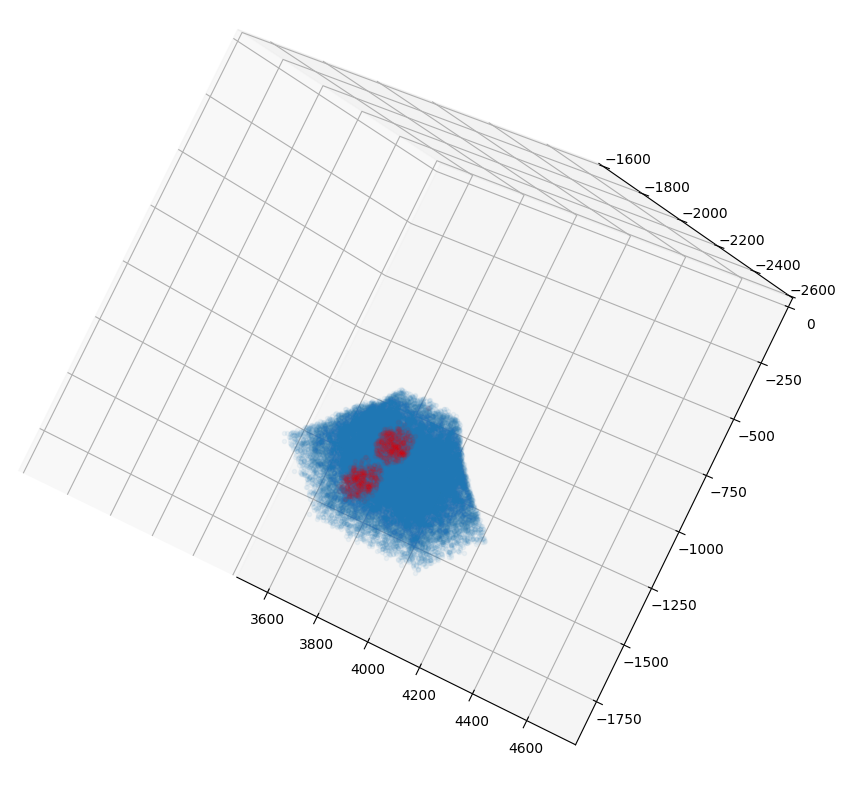

In [95]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(50, -5, 60)
ax.set_xlim([3500, 4750]);
ax.set_zlim([-2600, -1600]);
ax.set_ylim([-1900, 0]);
plt.plot(filtered["soma_location"].x, filtered["soma_location"].y, filtered["soma_location"].z, ".", alpha=0.05);
plt.plot(sorted_cell_location.x, sorted_cell_location.y, sorted_cell_location.z, "r.", alpha=0.05);

## Get the probe

In [9]:
# get probe mapped to recording
traces = silico_preprocess.run()
probe = traces.get_probe()

Invalid absolute path: /gpfs/bbp.cscs.ch/project/proj45/scratch/S1full/METypes
Have keys ({'LFPWeightsPath', 'KeepModelData'}) that are not defined for section: Run
Ignoring unknown key: 'LFPWeightsPath'
Ignoring unknown key: 'KeepModelData'


write_binary_recording with n_jobs = 1 and chunk_size = None


## Co-localize them

Given the probe's location in the microcircuit, the two middle shanks should record lots of activity, while the shanks at the extreme left and right should capture little to nothing.

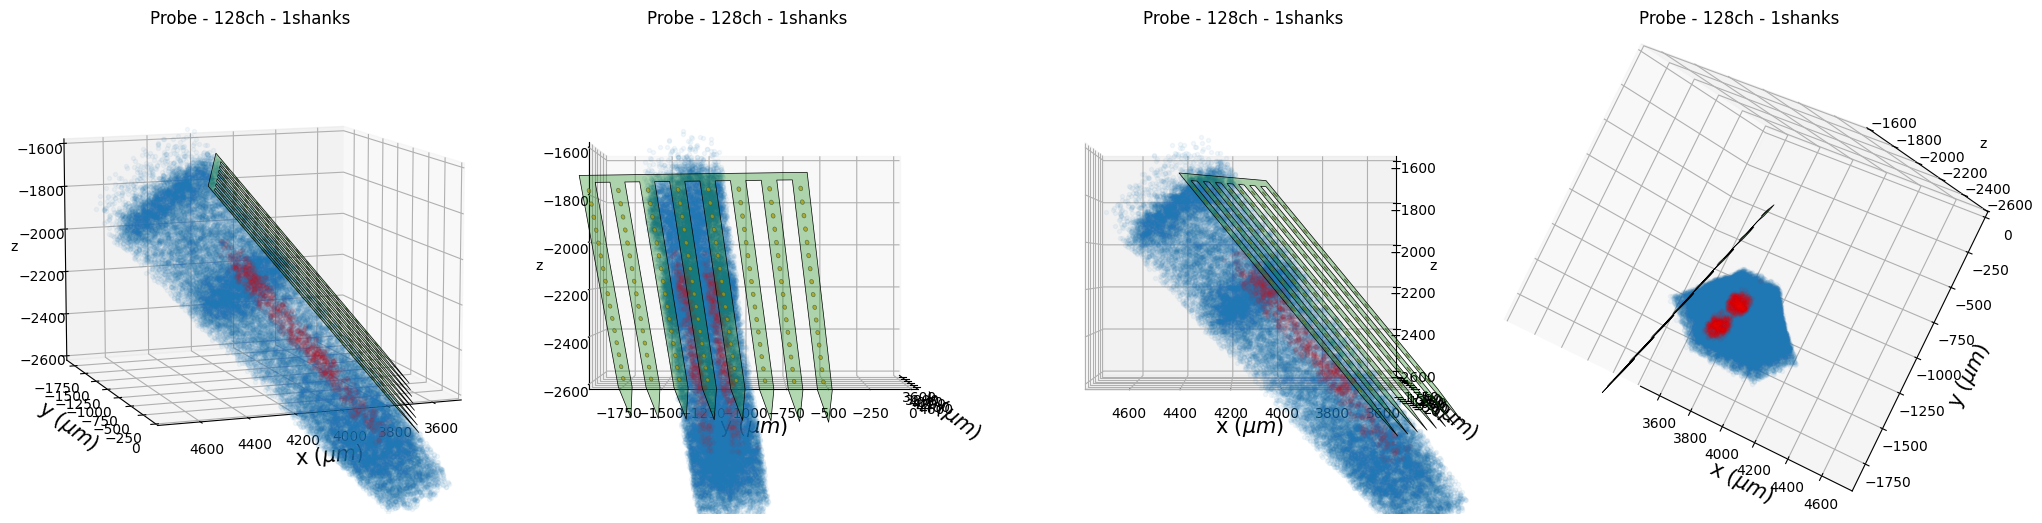

In [93]:
# View in contact channel locations in 3D
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(141, projection='3d')
ax.view_init(10, 70)
plot_probe(probe, ax=ax);
ax.set_xlim([3500, 4750]);
ax.set_zlim([-2600, -1600]);
ax.set_ylim([-1900, 0]);
plt.plot(filtered["soma_location"].x, filtered["soma_location"].y, filtered["soma_location"].z, ".", alpha=0.05);
plt.plot(sorted_cell_location.x, sorted_cell_location.y, sorted_cell_location.z, "r.", alpha=0.05);

# angle view 2
ax = fig.add_subplot(142, projection='3d')
ax.view_init(0, 0)
plot_probe(probe, ax=ax);
ax.set_xlim([3500, 4750]);
ax.set_zlim([-2600, -1600]);
ax.set_ylim([-1900, 0]);
plt.plot(filtered["soma_location"].x, filtered["soma_location"].y, filtered["soma_location"].z, ".", alpha=0.05);
plt.plot(sorted_cell_location.x, sorted_cell_location.y, sorted_cell_location.z, "r.", alpha=0.05);

# angle view 3
ax = fig.add_subplot(143, projection='3d')
ax.view_init(0, 90)
plot_probe(probe, ax=ax);
ax.set_xlim([3500, 4750]);
ax.set_zlim([-2600, -1600]);
ax.set_ylim([-1900, 0]);
plt.plot(filtered["soma_location"].x, filtered["soma_location"].y, filtered["soma_location"].z, ".", alpha=0.05);
plt.plot(sorted_cell_location.x, sorted_cell_location.y, sorted_cell_location.z, "r.", alpha=0.05);

# angle view 4
ax = fig.add_subplot(144, projection='3d')
ax.view_init(50, -5, 60)
plot_probe(probe, ax=ax);
ax.set_xlim([3500, 4750]);
ax.set_zlim([-2600, -1600]);
ax.set_ylim([-1900, 0]);
plt.plot(filtered["soma_location"].x, filtered["soma_location"].y, filtered["soma_location"].z, ".", alpha=0.05);
plt.plot(sorted_cell_location.x, sorted_cell_location.y, sorted_cell_location.z, "r.", alpha=0.05);

plt.tight_layout()

# References

(1) https://bbpgitlab.epfl.ch/nse/bluepy/-/blob/main/examples/ipython_notebooks/Usecase%201%20-%20Selecting%20cells%20from%20a%20circuit.ipynb 

(2) https://bbpteam.epfl.ch/documentation/projects/bluepy/latest/index.html 

(3) https://bbpteam.epfl.ch/documentation/projects/bluepy/latest/circuit.html 